In [1]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import re
import string
from collections import Counter, defaultdict

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# Import Natural Language Toolkit library and clean text data by removing commonly used words

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /media/ntu/volume1/home/s124md303_05/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Preprocessing: Clean Unwanted characters, emoji , tokenizing words and symbols, and removing punctuation

In [3]:
import re
from typing import Union, List

class CleanText():
    """ clearing text except digits () . , word character """

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text

def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

clean = CleanText()

# Encoded label 0 corresponds to "Negative"
# Encoded label 1 corresponds to "Positive"

In [4]:
# Label to name
def label2name(x):
    if x == 0:
        return "Negative"  # Encoded label 0 corresponds to "Negative"
    if x == 1:
        return "Positive"   # Encoded label 1 corresponds to "Positive"

In [5]:
df = pd.read_json('train.json')

In [6]:
print("df.columns: ", df.columns)

df.columns:  Index(['reviews', 'sentiments'], dtype='object')


In [7]:
df.head()

reviews  sentiments
0  I bought this belt for my daughter in-law for ...           1
1  The size was perfect and so was the color.  It...           1
2  Fits and feels good, esp. for doing a swim rac...           1
3  These socks are absolutely the best. I take pi...           1
4  Thank you so much for the speedy delivery they...           1

# Distribution of sentiment ratings in dataset by showing count of review in each sentiment category

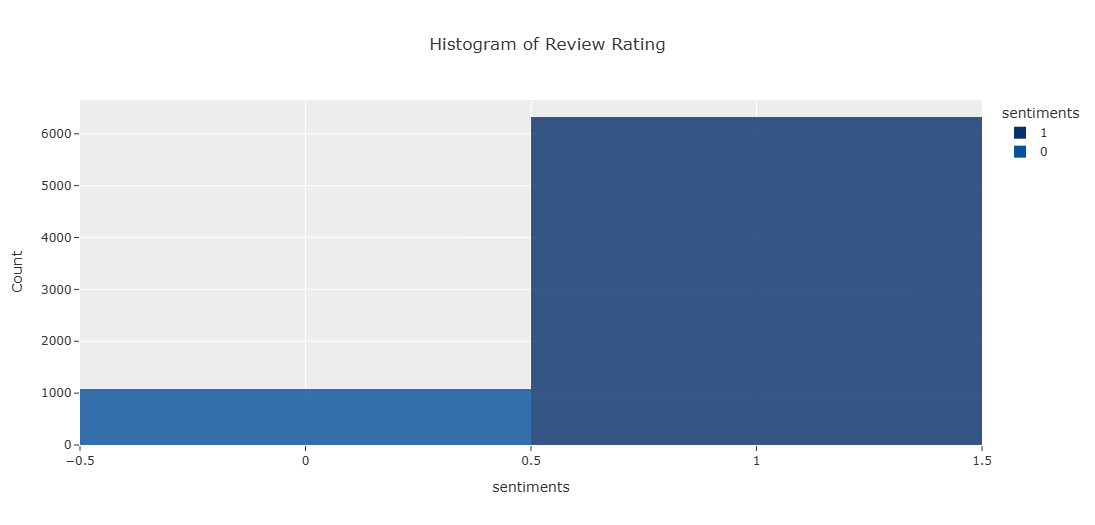

In [8]:
# count of ratings
fig = px.histogram(df,
             x = 'sentiments',
             title = 'Histogram of Review Rating',
             template = 'ggplot2',
             color = 'sentiments',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7401 entries, 0 to 7400
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviews     7401 non-null   object
 1   sentiments  7401 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 115.8+ KB


# Add new Column

In [10]:
#  mapping label name
df["label_name"] = df["sentiments"].apply(lambda x: label2name(x))

# Clean text

In [11]:
# clean text, lowercase and remove punk
df["reviews"] = df["reviews"].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))

In [12]:
df.head()

reviews  sentiments label_name
0  i bought this belt for my daughter in law for ...           1   Positive
1  the size was perfect and so was the color   it...           1   Positive
2  fits and feels good  esp  for doing a swim rac...           1   Positive
3  these socks are absolutely the best  i take pi...           1   Positive
4  thank you so much for the speedy delivery they...           1   Positive

In [13]:
df.tail()

reviews  sentiments label_name
7396  i bought these shirts  black  medium  to wear ...           0   Negative
7397  at first  i thought this scarf might not be th...           1   Positive
7398  i am very picky when it comes to bras   i want...           1   Positive
7399  this jacket is wind and water resistant  but n...           0   Negative
7400  these are extremely confortable  the material ...           1   Positive

# Generate and display word cloud

In [14]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40,
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

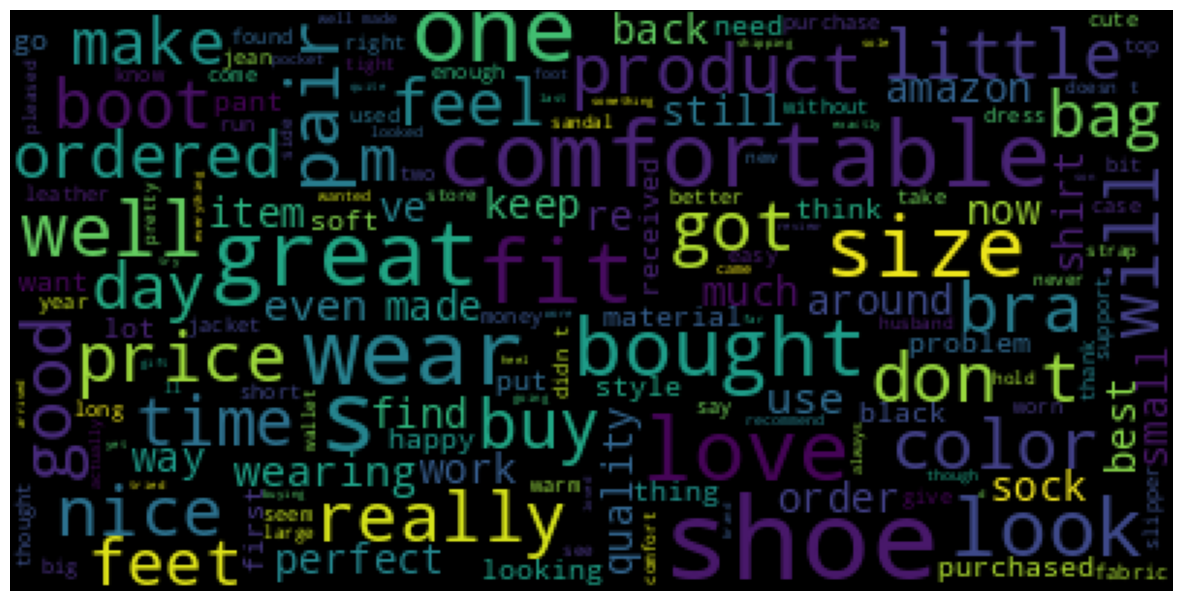

In [15]:
show_wordcloud(df["reviews"].values)

# Tokenize text data from "review" column and calculate token count to enable text data to be process or analyzed on word-by-word basis

In [16]:
# tokenize data
df["tokenized_review"] = df.reviews.apply(lambda x: tokenize(x))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_review"].apply(lambda x: len(x.split()))

# Visual summary of distribution of review lengths in token count, showingthe % of reviews that fall within each bin of token counts

In [17]:
fig = px.histogram(df, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

# Calculate proportion of review that have token count less than 512

In [18]:
(df.sent_token_length < 512).mean()

0.9986488312390217

In [19]:
import warnings
warnings.filterwarnings('ignore')

# Bidirectional Encoder Representations from Transformers

In [21]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)

# Count token and analyse text

In [22]:
# data tokenize with bert tokenizer
df["sent_bert_token_length"] = df["reviews"].apply(lambda x: len(tokenizer(x, add_special_tokens=False)["input_ids"]))

Token indices sequence length is longer than the specified maximum sequence length for this model (650 > 512). Running this sequence through the model will result in indexing errors


# Visualising review lengths and understanding patterns

In [23]:
fig = px.histogram(df, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

# See how may reviews that are under 512 tokens

In [24]:
# Less than 512 covers how many of the data
(df.sent_bert_token_length < 512).mean()

0.9982434806107283

# Visualize Data distribution

In [25]:
# valvulate char count for each review
df['char_count'] = df['reviews'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 )
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)

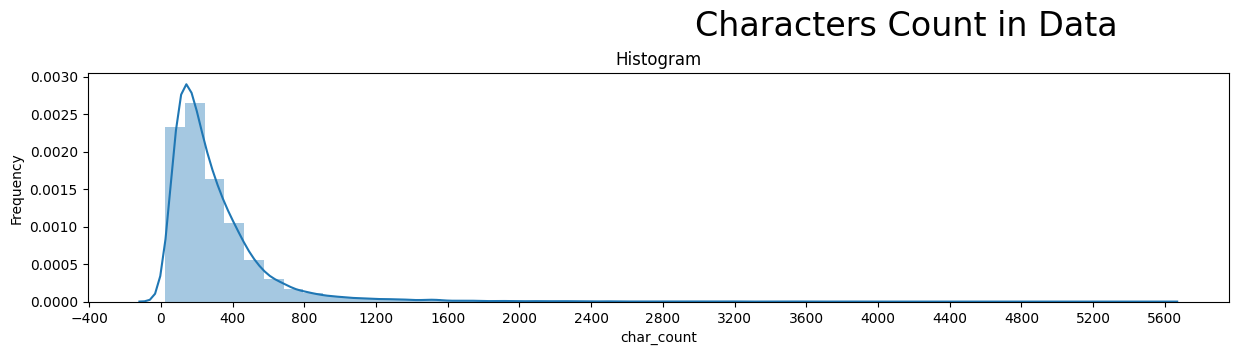

In [26]:
plot_dist3(df, 'char_count','Characters Count in Data')

In [27]:
# Creating a new feature for the visualization.
df['Character Count'] = df['reviews'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    plt.suptitle(f'{title}', fontsize=24)

# Visualize Character Count Distribution for "Negative" Review

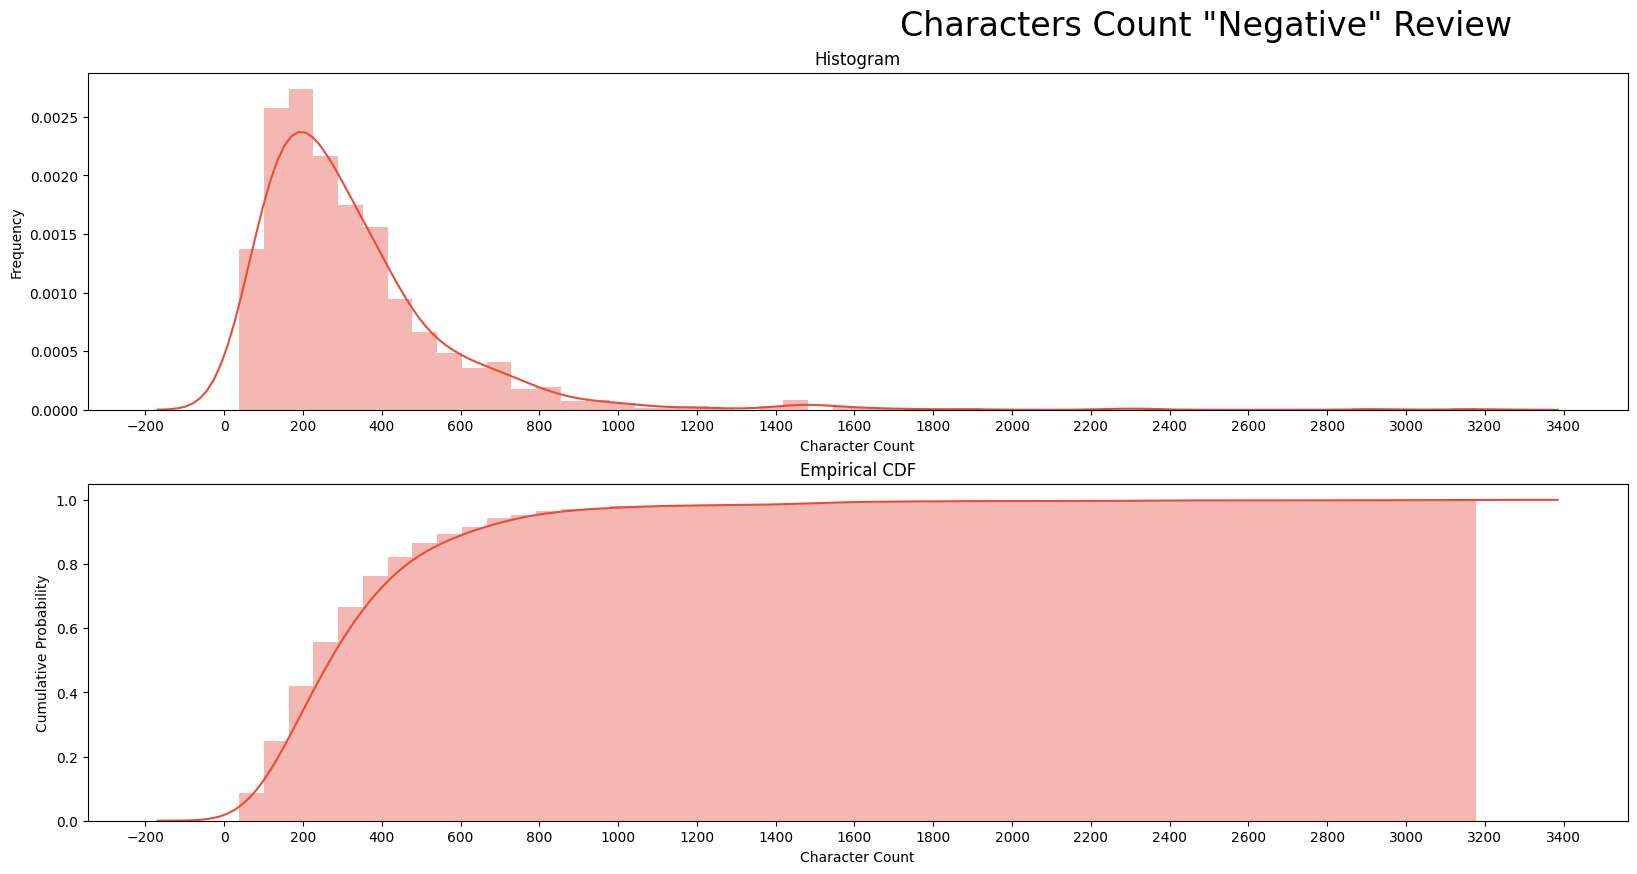

In [28]:
plot_dist3(df[df['sentiments'] == 0], 'Character Count','Characters Count "Negative" Review')

# Visualize Character Count Distribution for "Positive" Review

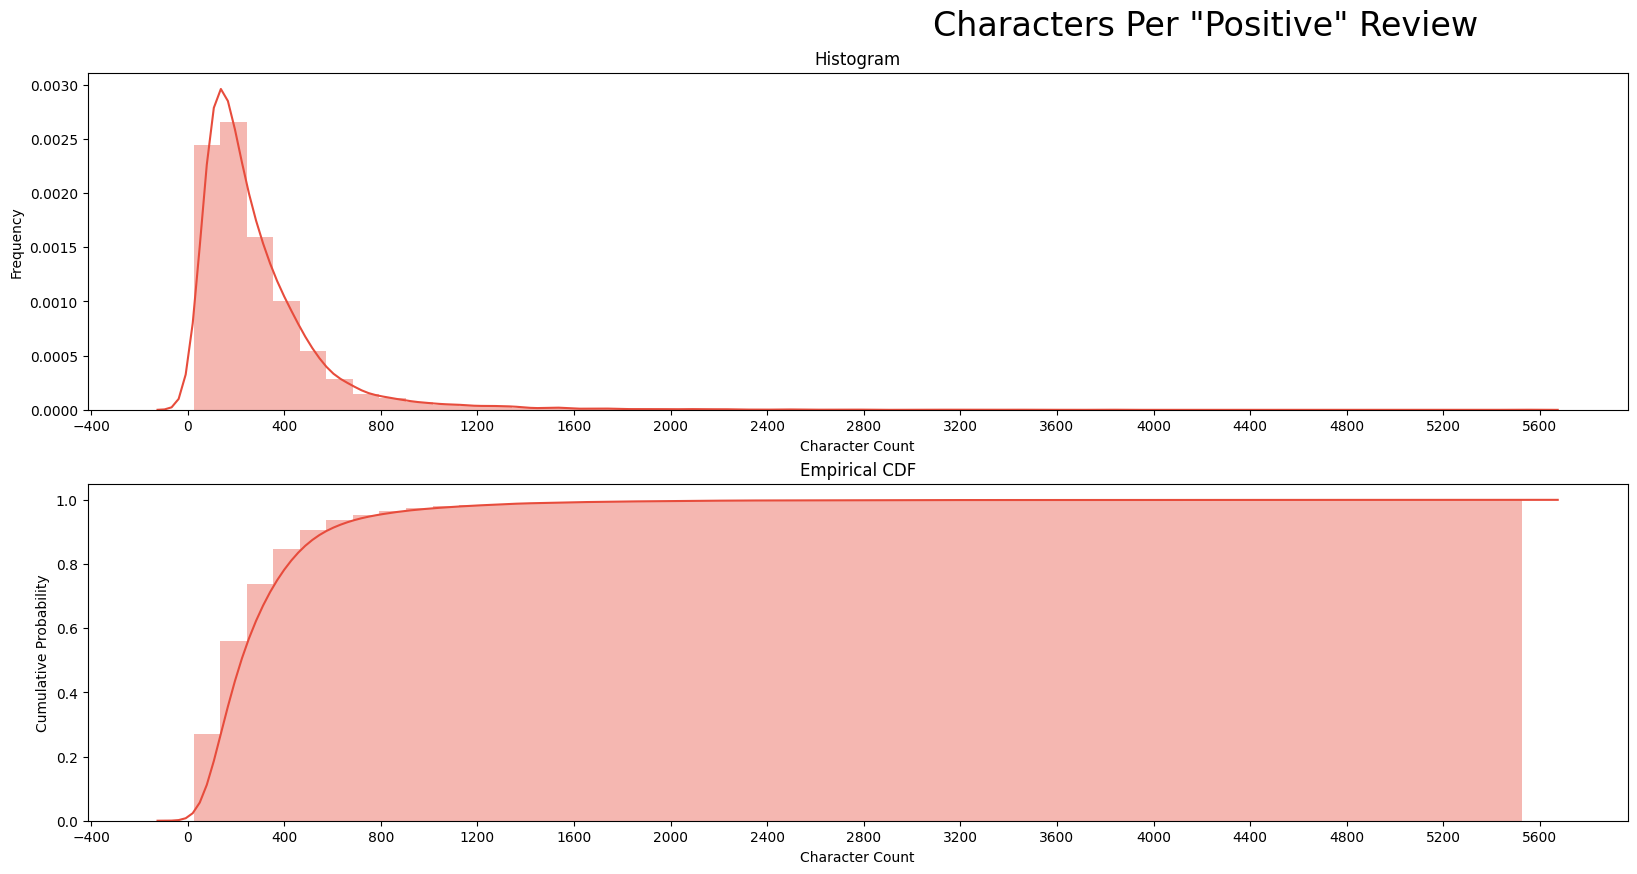

In [29]:
plot_dist3(df[df['sentiments'] == 1], 'Character Count','Characters Per "Positive" Review')

In [30]:
def plot_word_number_histogram(textno,textz):

    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(18, 12), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textz.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')


    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('negative')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('pozitive')

    fig.suptitle('Words Per Review', fontsize=24, va='baseline')

    fig.tight_layout()

# Compare the word count of reviews

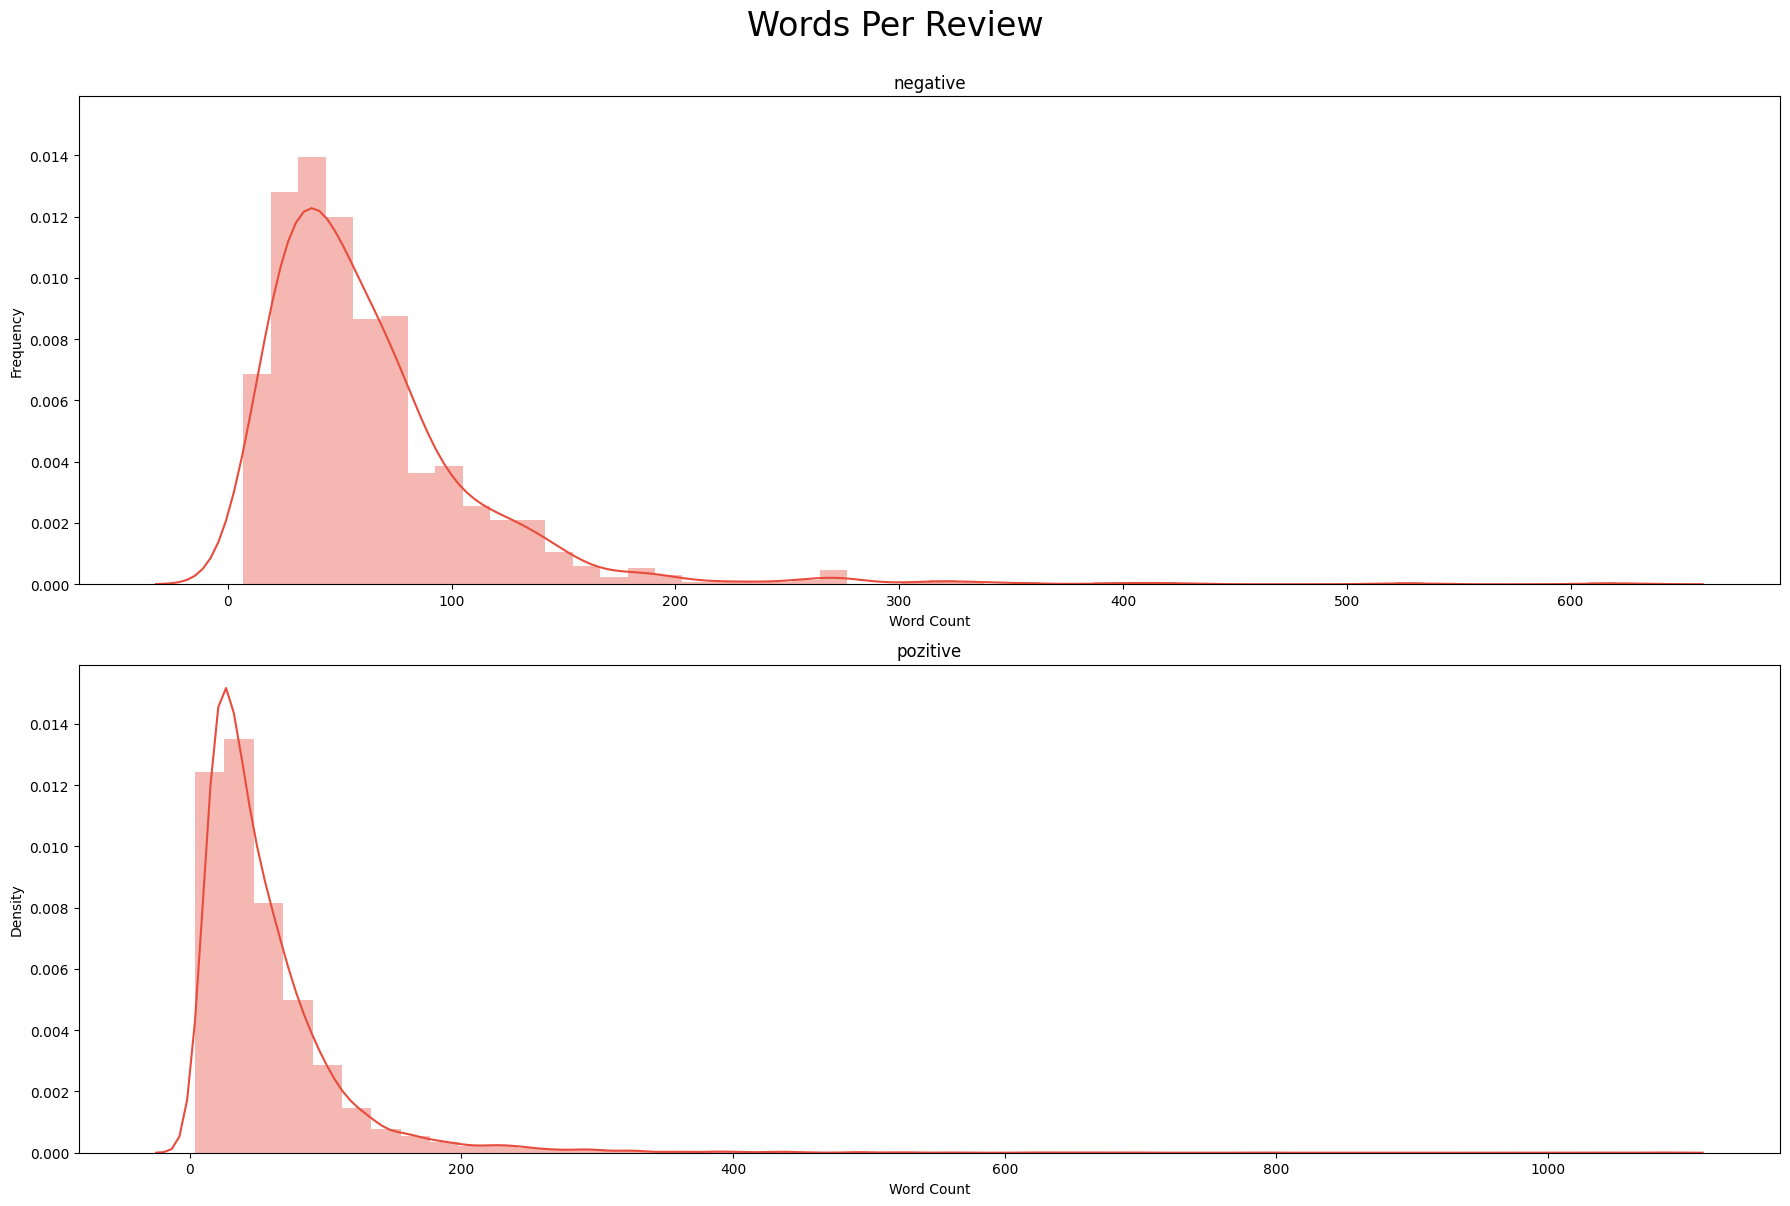

In [31]:
plot_word_number_histogram(df[df['sentiments'] == 0]['reviews'],df[df['sentiments'] == 1]['reviews'])

# Remove Punctuation

In [32]:
df['tokenized_review'] = df['tokenized_review'].apply(lambda x: remove_punct(x))

# Plot most common words

In [33]:
texts = df['tokenized_review']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:40]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show()

## Visualise them in Single, double and tripple words

In [34]:
fig = make_subplots(rows=1, cols=2)
title_ = ["negative", "neutral", "positive"]

colors = ['#e74c3c', '#2ecc71']  # Red for negative, green for positive
for i in range(2):
    texts = df[df["sentiments"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:40]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ),)


fig.show()

In [35]:
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

In [36]:
# unigram
fig = make_subplots(rows=1, cols=2)

title_ = ["negative", "positive"]

for i in range(2):
    texts = df[df["sentiments"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)


fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common unigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
fig.show()

In [37]:
#trigram

fig = make_subplots(rows=1, cols=2)
title_ = ["negative", "positive"]

for i in range(2):
    texts =df[df["sentiments"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))

fig.show()

In [38]:
import pandas as pd
import numpy as np
import os
import random
from pathlib import Path
import json

In [39]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

# Configuration: seed value, epoch, batch size, learning rate etc

In [40]:
class Config():
    seed_val = 17
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    epochs = 5
    batch_size = 16
    seq_length = 512
    lr = 2e-5
    eps = 1e-8
    pretrained_model = 'bert-base-uncased'
    test_size=0.15
    random_state=42
    add_special_tokens=True
    return_attention_mask=True
    pad_to_max_length=True
    do_lower_case=False
    return_tensors='pt'

config = Config()

In [41]:
# params will be saved after training
params = {"seed_val": config.seed_val,
    "device":str(config.device),
    "epochs":config.epochs,
    "batch_size":config.batch_size,
    "seq_length":config.seq_length,
    "lr":config.lr,
    "eps":config.eps,
    "pretrained_model": config.pretrained_model,
    "test_size":config.test_size,
    "random_state":config.random_state,
    "add_special_tokens":config.add_special_tokens,
    "return_attention_mask":config.return_attention_mask,
    "pad_to_max_length":config.pad_to_max_length,
    "do_lower_case":config.do_lower_case,
    "return_tensors":config.return_tensors,
         }

# Reproducibility: Random Seed

In [42]:
# set random seed and device
import random

device = config.device

random.seed(config.seed_val)
np.random.seed(config.seed_val)
torch.manual_seed(config.seed_val)
torch.cuda.manual_seed_all(config.seed_val)

In [43]:
# count of unique label  control
print(len(df['sentiments'].unique()))
print(df.shape)

2
(7401, 8)


# train_df: The main training dataset used for model training.
# val_df: The validation dataset used to evaluate model performance during training.
# test_df: The test dataset used for the final evaluation of the model after training is complete.

In [44]:
#split train test
from sklearn.model_selection import train_test_split

train_df_, val_df = train_test_split(df,test_size=0.10,random_state=config.random_state,stratify=df.sentiments.values)

In [45]:
train_df, test_df = train_test_split(train_df_,test_size=0.10,random_state=42,stratify=train_df_.sentiments.values)

In [46]:
# count of unique label  control
print(len(train_df['sentiments'].unique()))
print(train_df.shape)

2
(5994, 8)


In [47]:
# count of unique label  control
print(len(val_df['sentiments'].unique()))
print(val_df.shape)

2
(741, 8)


In [48]:
print(len(test_df['sentiments'].unique()))
print(test_df.shape)

2
(666, 8)


# Input Layer:

In [49]:
# create tokenizer
tokenizer = BertTokenizer.from_pretrained(config.pretrained_model,do_lower_case=config.do_lower_case)

# Input Layer: Prepares data for input into BERT

In [50]:
encoded_data_train = tokenizer.batch_encode_plus(
    train_df.reviews.values,
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors
)
encoded_data_val = tokenizer.batch_encode_plus(
    val_df.reviews.values,
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


# Prepares data for training and validation by creating tensors

In [51]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_df.sentiments.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(val_df.sentiments.values)

# Create datasets and batch data

In [52]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

# Load pre-train model

In [53]:
model = BertForSequenceClassification.from_pretrained(config.pretrained_model,num_labels=2,output_attentions=False,output_hidden_states=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Manage training and validation sets

In [54]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

dataloader_train = DataLoader(dataset_train,sampler=RandomSampler(dataset_train),batch_size=config.batch_size)

dataloader_validation = DataLoader(dataset_val,sampler=SequentialSampler(dataset_val),batch_size=config.batch_size)

# AdamW Optimizer: Update model parameters during backpropagation
# Scheduler: Adjust learning rate throughout training process

In [55]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),lr=config.lr,eps=config.eps)

scheduler = get_linear_schedule_with_warmup(optimizer,num_warmup_steps=1000,num_training_steps=len(dataloader_train)*config.epochs)

# Evaluate performace of model

In [56]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels, label_dict):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

# Output Layer: Training Loop

In [57]:
def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(config.device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    # calculate avareage val loss
    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [58]:
config.device

device(type='cuda', index=0)

# Complete Training Loop

In [59]:
model.to(config.device)

for epoch in tqdm(range(1, config.epochs+1)):

    model.train()

    loss_train_total = 0
    # allows you to see the progress of the training
    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)

    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(config.device) for b in batch)


        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f'_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')

    tqdm.write(f'F1 Score (Weighted): {val_f1}');
# save model params and other configs
with Path('params.json').open("w") as f:
    json.dump(params, f, ensure_ascii=False, indent=4)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/375 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.3756880489488443
Validation loss: 0.17355916783847708
F1 Score (Weighted): 0.94477498584681


Epoch 2:   0%|          | 0/375 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.15784180974091092
Validation loss: 0.16195618511831505
F1 Score (Weighted): 0.9510619480912345


Epoch 3:   0%|          | 0/375 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.10496409286434452
Validation loss: 0.2363414439295934
F1 Score (Weighted): 0.9527769496332225


Epoch 4:   0%|          | 0/375 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.04963345549767837
Validation loss: 0.2183397383369664
F1 Score (Weighted): 0.9557477169651765


Epoch 5:   0%|          | 0/375 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.01787174514789755
Validation loss: 0.2332072416846789
F1 Score (Weighted): 0.9544625696875988


In [60]:
model.load_state_dict(torch.load(f'./_BERT_epoch_4.model', map_location=torch.device('cpu')))

<All keys matched successfully>

In [61]:
from sklearn.metrics import classification_report

preds_flat = np.argmax(predictions, axis=1).flatten()
print(classification_report(preds_flat, true_vals))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        97
           1       0.98      0.97      0.97       644

    accuracy                           0.96       741
   macro avg       0.89      0.93      0.91       741
weighted avg       0.96      0.96      0.96       741



# Error Analysis

In [62]:
# step by step predictions on dataframe
# We do this to view predictions in the pandas dataframe and easily filter them and perform error analysis.

pred_final = []

for i, row in tqdm(val_df.iterrows(), total=val_df.shape[0]):
    predictions = []

    review = row["reviews"]
    encoded_data_test_single = tokenizer.batch_encode_plus(
    [review],
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors
    )
    input_ids_test = encoded_data_test_single['input_ids']
    attention_masks_test = encoded_data_test_single['attention_mask']


    inputs = {'input_ids':      input_ids_test.to(device),
              'attention_mask':attention_masks_test.to(device),
             }

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)
    predictions = np.concatenate(predictions, axis=0)
    pred_final.append(np.argmax(predictions, axis=1).flatten()[0])

  0%|          | 0/741 [00:00<?, ?it/s]

# Add pred into val_df

In [63]:
val_df["pred"] = pred_final

# Add control column for easier wrong and right predictions

# Filtering false predictions

In [64]:
control = val_df.pred.values == val_df.sentiments.values
val_df["control"] = control

In [65]:
val_df = val_df[val_df.control == False]

# label to intent mapping

In [66]:
name2label = {"Negative":0,
             "Positive":1
             }
label2name = {v: k for k, v in name2label.items()}

val_df["pred_name"] = val_df.pred.apply(lambda x: label2name.get(x))

# Create confusion matrix

In [67]:
from sklearn.metrics import confusion_matrix

# We create a confusion matrix to better observe the classes that the model confuses.
pred_name_values = val_df.pred_name.values
label_values = val_df.label_name.values
confmat = confusion_matrix(label_values, pred_name_values, labels=list(name2label.keys()))

In [68]:
confmat

array([[ 0, 22],
       [10,  0]])

In [69]:
df_confusion_val = pd.crosstab(label_values, pred_name_values)
df_confusion_val

col_0     Negative  Positive
row_0                       
Negative         0        22
Positive        10         0

In [70]:
# save confissuan matrix df
df_confusion_val.to_csv("val_df_confusion.csv")

In [71]:
test_df.head()

reviews  sentiments  \
3558  i absoutely love these boots   they are extrem...           1   
6790  my son is now over 12lbs at 6 weeks and these ...           1   
5366  the one thing i can say is that the shoe squee...           1   
5566  such a cute and comfortable shoe  feels like a...           1   
2731  this is my second pair  i bought another brand...           1   

     label_name                                   tokenized_review  \
3558   Positive  i absoutely love these boots they are extremel...   
6790   Positive  my son is now over 12 lbs at 6 weeks and these...   
5366   Positive  the one thing i can say is that the shoe squee...   
5566   Positive  such a cute and comfortable shoe feels like a ...   
2731   Positive  this is my second pair i bought another brand ...   

      sent_token_length  sent_bert_token_length  char_count  Character Count  
3558                 70                      74         357              357  
6790                 29                      31         125              125  
5366                 84                      91         409              409  
5566                 15                      16          81               81  
2731                 85                      90         434              434

# Transform the raw text reviews into a format that the BERT model can understand

In [72]:
encoded_data_test = tokenizer.batch_encode_plus(
    test_df.reviews.values,
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors
)

# Prepare the data for the evaluation phase, where you'll input the test data into your trained model

In [73]:
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(test_df.sentiments.values)

# Hidden/ BERT Layer

In [74]:
model = BertForSequenceClassification.from_pretrained(config.pretrained_model,
                                                      num_labels=2,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(config.device)

model.load_state_dict(torch.load(f'./_BERT_epoch_4.model', map_location=torch.device('cpu')))

_, predictions_test, true_vals_test = evaluate(dataloader_validation)
# accuracy_per_class(predictions, true_vals, intent2label)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [75]:
from sklearn.metrics import classification_report

preds_flat_test = np.argmax(predictions_test, axis=1).flatten()
print(classification_report(preds_flat_test, true_vals_test))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        94
           1       0.98      0.96      0.97       647

    accuracy                           0.95       741
   macro avg       0.88      0.93      0.90       741
weighted avg       0.96      0.95      0.96       741



#  Predicts sentiments for reviews in your test dataset using a BERT model. The predictions are stored in pred_final, which can be used for evaluation or further analysis.

In [76]:
pred_final = []

for i, row in tqdm(test_df.iterrows(), total=test_df.shape[0]):
    predictions = []

    review = row["reviews"]
    encoded_data_test_single = tokenizer.batch_encode_plus(
    [review],
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors
    )
    input_ids_test = encoded_data_test_single['input_ids']
    attention_masks_test = encoded_data_test_single['attention_mask']


    inputs = {'input_ids':      input_ids_test.to(device),
              'attention_mask':attention_masks_test.to(device),
             }

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)
    predictions = np.concatenate(predictions, axis=0)
    pred_final.append(np.argmax(predictions, axis=1).flatten()[0])

  0%|          | 0/666 [00:00<?, ?it/s]

In [77]:
# add pred into test
test_df["pred"] = pred_final

In [78]:
#  Add control column for easier wrong and right predictions
control = test_df.pred.values == test_df.sentiments.values
test_df["control"] = control

In [79]:
# filtering false predictions
test_df = test_df[test_df.control == False]

In [80]:
test_df["pred_name"] = test_df.pred.apply(lambda x: label2name.get(x))

In [81]:
from sklearn.metrics import confusion_matrix

# We create a confusion matrix to better observe the classes that the model confuses.
pred_name_values = test_df.pred_name.values
label_values = test_df.label_name.values
confmat = confusion_matrix(label_values, pred_name_values, labels=list(name2label.keys()))

In [82]:
confmat

array([[ 0, 18],
       [14,  0]])

In [83]:
df_confusion_test = pd.crosstab(label_values, pred_name_values)
df_confusion_test

col_0     Negative  Positive
row_0                       
Negative         0        18
Positive        14         0

# Predict test.json file

In [84]:
actualtest_df = pd.read_json('test.json')

In [85]:
pred_final = []


for i, row in tqdm(actualtest_df.iterrows(), total=actualtest_df.shape[0]):
    review = row["reviews"] 


    encoded_data_test_single = tokenizer.batch_encode_plus(
        [review],
        add_special_tokens=config.add_special_tokens,
        return_attention_mask=config.return_attention_mask,
        pad_to_max_length=config.pad_to_max_length,
        max_length=config.seq_length,
        return_tensors=config.return_tensors
    )


    input_ids_test = encoded_data_test_single['input_ids']
    attention_masks_test = encoded_data_test_single['attention_mask']

    inputs = {
        'input_ids': input_ids_test.to(device),
        'attention_mask': attention_masks_test.to(device),
    }


    with torch.no_grad():
        outputs = model(**inputs)


    logits = outputs[0].detach().cpu().numpy()
    pred_final.append(np.argmax(logits, axis=1).flatten()[0]) 

  0%|          | 0/1851 [00:00<?, ?it/s]

In [86]:
actualtest_df['pred'] = pred_final

actualtest_df.to_csv('submission.csv', index=False)